In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train['Date'] = [time.ctime(int(i)) for i in train['timestamp'].tolist()]
train.index = train['Date']

In [4]:
btc = train[train['Asset_ID'] == 1]
btc = btc[btc['Date'].str.contains('2021')]
#train_btc_2021 = train_btc[train_btc['Date'].str.contains('2021')]
#btc = pd.concat([train_btc_2020, train_btc_2021])

<AxesSubplot:xlabel='Date'>

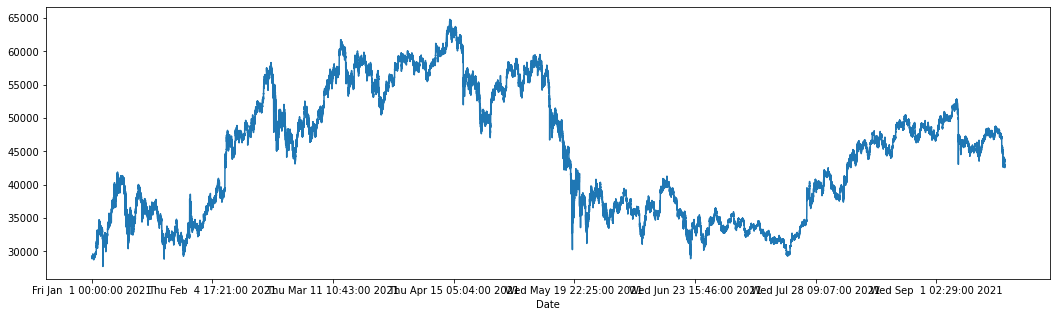

In [5]:
plt.figure(figsize=(18,5))
btc['Close'].plot()

In [6]:
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [7]:
check_adfuller(btc.Close.values)

Test statistic:  -2.1791700953538276
p-value:  0.21389217659227266
Critical Values: {'1%': -3.430367285219841, '5%': -2.8615476398582995, '10%': -2.566774066418442}


In [8]:
btc['diff_1'] = btc.Close.diff() 
btc = btc.tail(btc.shape[0]-1)

<AxesSubplot:xlabel='Date'>

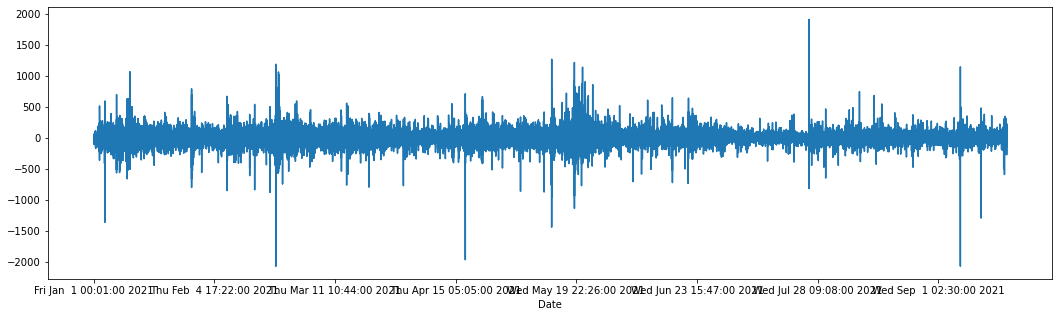

In [9]:
plt.figure(figsize=(18,5))
btc['diff_1'].plot()

In [10]:
check_adfuller(btc.diff_1.values)

Test statistic:  -65.03918161965657
p-value:  0.0
Critical Values: {'1%': -3.430367285219841, '5%': -2.8615476398582995, '10%': -2.566774066418442}


In [11]:
btc.to_csv('btc_2021_stationary.csv')

In [12]:
btc

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Date,diff_1
Date,,,,,,,,,,,,
Fri Jan 1 00:01:00 2021,1609477260,1,1199.0,29243.940000,29290.350000,29192.01,29230.410000,56.792580,29237.225611,-0.000635,Fri Jan 1 00:01:00 2021,-11.441429
Fri Jan 1 00:02:00 2021,1609477320,1,1883.0,29231.661429,29272.770000,29159.93,29206.093809,116.000731,29211.746752,-0.000817,Fri Jan 1 00:02:00 2021,-24.316191
Fri Jan 1 00:03:00 2021,1609477380,1,1924.0,29206.520946,29248.120000,29134.25,29177.972857,82.912729,29190.368383,-0.000381,Fri Jan 1 00:03:00 2021,-28.120952
Fri Jan 1 00:04:00 2021,1609477440,1,1551.0,29176.697714,29235.850000,29132.23,29193.644286,71.558229,29184.897545,0.000764,Fri Jan 1 00:04:00 2021,15.671429
Fri Jan 1 00:05:00 2021,1609477500,1,1057.0,29196.178571,29242.670000,29154.18,29192.605714,39.051663,29193.273491,0.000534,Fri Jan 1 00:05:00 2021,-1.038571
...,...,...,...,...,...,...,...,...,...,...,...,...
Mon Sep 20 19:56:00 2021,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN,Mon Sep 20 19:56:00 2021,-86.201967
Mon Sep 20 19:57:00 2021,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN,Mon Sep 20 19:57:00 2021,-39.007143
Mon Sep 20 19:58:00 2021,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN,Mon Sep 20 19:58:00 2021,-32.985714
